# TP2: Regresión del valor de valor medio de casas en distritos de California (20Co2025)
**Integrantes:**
- Bernardo Maximiliano José.
- Tacchella Alejandro Nicolás.

Se requiere construir una regresión que permita predecir el valor medio de las casas en distritos de California, EE. UU. (medido en cientos de miles de dólares, es decir, $100,000). Este conjunto de datos proviene del censo de 1990 de EE. UU., donde cada observación corresponde a un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra. Un bloque típicamente tiene una población de entre 600 y 3.000 personas.

Los atributos, en el orden en que se encuentran en el conjunto de datos, son:

MedInc: Ingreso medio en el bloque
HouseAge: Edad mediana de las casas en el bloque
AveRooms: Número promedio de habitaciones por hogar.
AveBedrms: Número promedio de dormitorios por hogar.
Population: Población del bloque
AveOccup: Número promedio de miembros por hogar.
Latitude: Latitud del bloque
Longitude: Longitud del bloque
El target es:

MedHouseVal: Mediana del costo de las casas en el bloque (en unidades de $100,000).
Tareas y preguntas a resolver:

Obtener la correlación entre los atributos y entre los atributos y el target. ¿Qué atributo tiene mayor correlación lineal con el target? ¿Cuáles atributos parecen estar más correlacionados entre sí? Se pueden obtener los valores de correlación o graficarlos directamente utilizando un mapa de calor.
Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma tienen los histogramas? ¿Se observa alguna forma de campana que sugiera que los datos provienen de una distribución gaussiana, sin realizar pruebas de hipótesis?
Calcular la regresión lineal utilizando todos los atributos. Con el conjunto de entrenamiento, calcular la varianza total del modelo y la varianza explicada por el modelo. ¿Está el modelo capturando el comportamiento del target? Expanda su respuesta.
Calcular las métricas de MSE, MAE y R² para el conjunto de evaluación.
Crear una regresión de Ridge. Usando validación cruzada de 5 folds y tomando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α.
Comparar entre la regresión lineal y la mejor regresión de Ridge los resultados obtenidos en el conjunto de evaluación. ¿Cuál de los dos modelos da mejores resultados (usando MSE y MAE)? Conjeturar por qué el modelo que da mejores resultados mejora. ¿Qué error se puede haber reducido?


In [5]:
pip install -r requirements.txt

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\mbernardo\Desktop\postgrado\IA\ceia_iia_tps\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

In [9]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


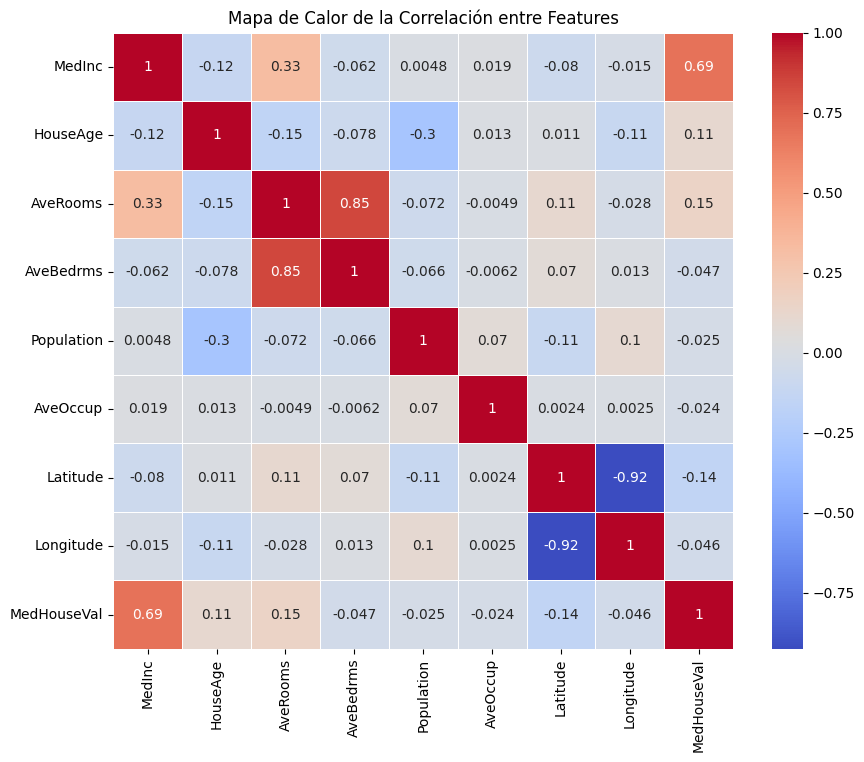

In [11]:
correlation_matrix = df_california.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación entre Features')
plt.show()